In [1]:
import numpy as np
from tensorflow.keras import utils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score,mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [2]:
#loading the images
images = utils.image_dataset_from_directory('data', batch_size=545)

Found 545 files belonging to 2 classes.


In [3]:
#converting the images to numpy array
data_iterator = images.as_numpy_iterator()
data = data_iterator.next()

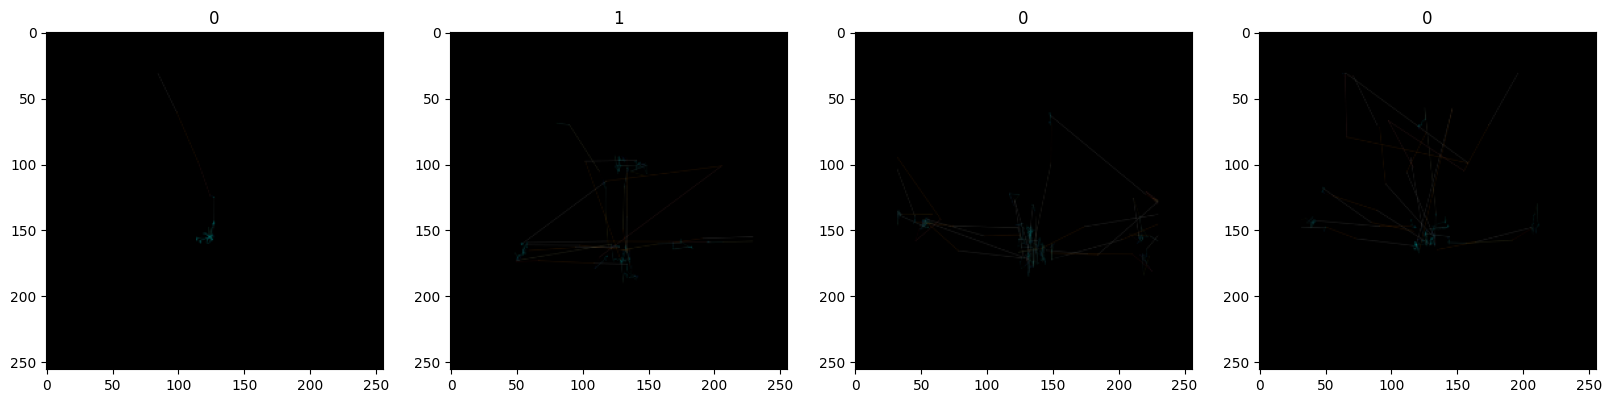

In [4]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(data[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(data[1][idx])

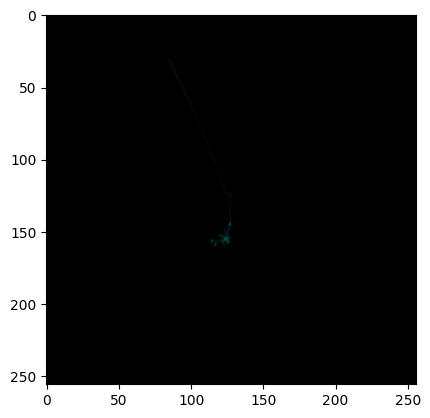

In [5]:
plt.imshow(data[0][0].astype(int))

In [6]:
before_scaling = data[0][0]

In [7]:
#scaling our images
images = images.map(lambda x,y: (x/255, y))
scaled_iterator = images.as_numpy_iterator()
data = scaled_iterator.next()


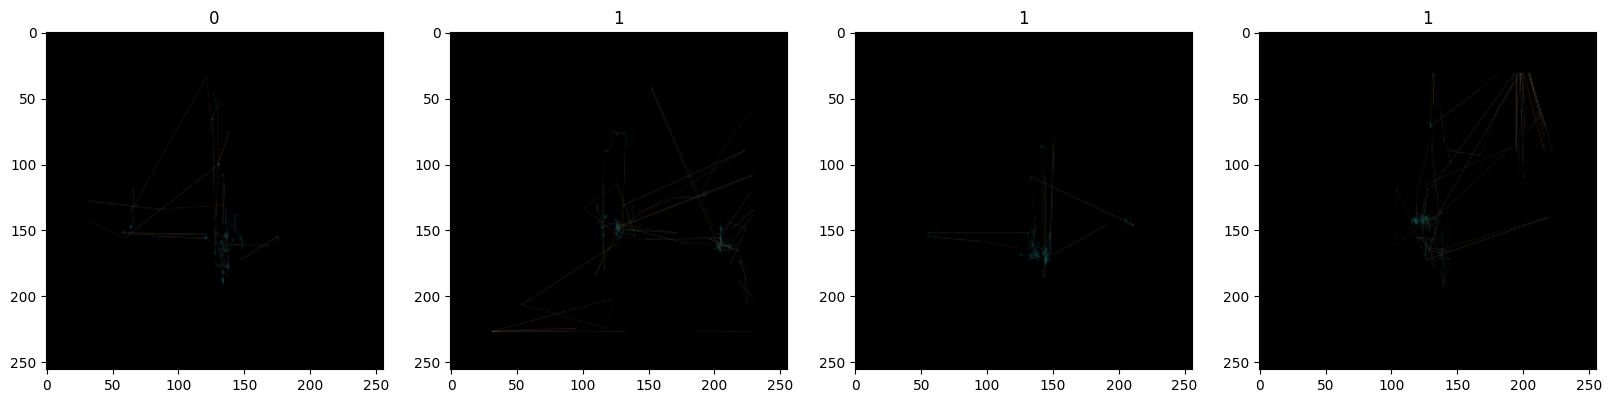

In [8]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(data[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(data[1][idx])

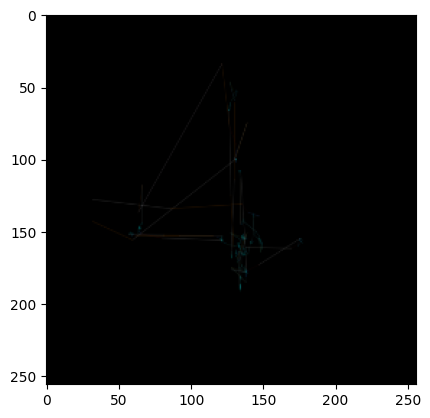

In [9]:
plt.imshow(data[0][0])

In [10]:
after_scaling = data[0][0]

In [11]:
x = data[0]

In [12]:
before_scaling == after_scaling

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ...,

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,

In [13]:
x.shape

(545, 256, 256, 3)

In [14]:
nsamples, nx, ny, nrgb = x.shape
x = x.reshape((nsamples,nx*ny*nrgb))

In [15]:
x.shape

(545, 196608)

In [16]:
y = data[1]
y.shape

(545,)

In [17]:
y = y.reshape(-1,1)
y.shape

(545, 1)

In [18]:
def pipeline(x, y, test_size, random_state, shuffle, n_splits, model):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state, shuffle=shuffle, stratify=y)
    kf = StratifiedKFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
    cnt=1
    average_accuracy=[]
    for train_index, val_index in kf.split(x_train, y_train):
        model = model.fit(x_train[train_index], y_train[train_index])
        y_predicted = model.predict(x_train[val_index])
        acc = accuracy_score(y_train[val_index], y_predicted)
        average_accuracy.append(acc)
        print(f"Fold_{cnt} accuracy: {acc}")
        cnt+=1
        print()
    print('-'*30)
    print(f"The average accuracy for the {n_splits} folds Train/Val: {np.average(average_accuracy)}")
    print('-'*30)
    test_predicted = model.predict(x_test)
    test_acc = accuracy_score(test_predicted, y_test)
    print(f"The final accuracy for the test set: {test_acc}")
    print(classification_report(test_predicted,y_test))

    conf_mat = confusion_matrix(y_test, test_predicted)
    ax = plt.subplot()
    sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax, cmap='Blues')

    # labels, title, and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Non ASD', 'ASD'])
    ax.yaxis.set_ticklabels(['Non ASD', 'ASD'])

c:\Users\Yousef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold_1 accuracy: 0.7572815533980582



c:\Users\Yousef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold_2 accuracy: 0.7281553398058253



c:\Users\Yousef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold_3 accuracy: 0.7647058823529411



c:\Users\Yousef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold_4 accuracy: 0.6470588235294118



c:\Users\Yousef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold_5 accuracy: 0.7156862745098039

------------------------------
The average accuracy for the 5 folds Train/Val: 0.722577574719208
------------------------------
The final accuracy for the test set: 0.696969696969697
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        22
           1       0.54      0.64      0.58        11

    accuracy                           0.70        33
   macro avg       0.67      0.68      0.67        33
weighted avg       0.71      0.70      0.70        33



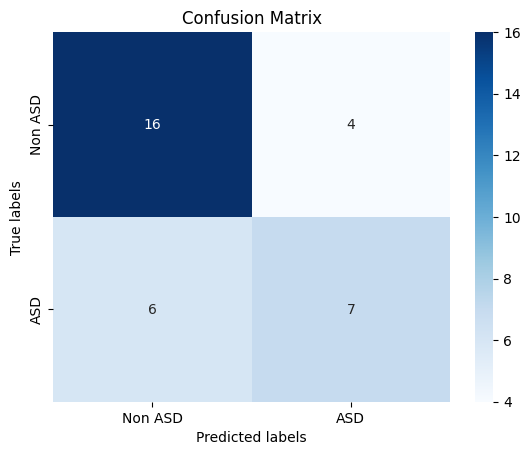

In [19]:
pipeline(x, y, 0.06, 42, True, 5, LogisticRegression())

c:\Users\Yousef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Fold_1 accuracy: 0.6019417475728155



c:\Users\Yousef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Fold_2 accuracy: 0.6213592233009708



c:\Users\Yousef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Fold_3 accuracy: 0.6274509803921569



c:\Users\Yousef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Fold_4 accuracy: 0.5980392156862745



c:\Users\Yousef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Fold_5 accuracy: 0.5882352941176471

------------------------------
The average accuracy for the 5 folds Train/Val: 0.607405292213973
------------------------------
The final accuracy for the test set: 0.6666666666666666
              precision    recall  f1-score   support

           0       1.00      0.65      0.78        31
           1       0.15      1.00      0.27         2

    accuracy                           0.67        33
   macro avg       0.58      0.82      0.53        33
weighted avg       0.95      0.67      0.75        33



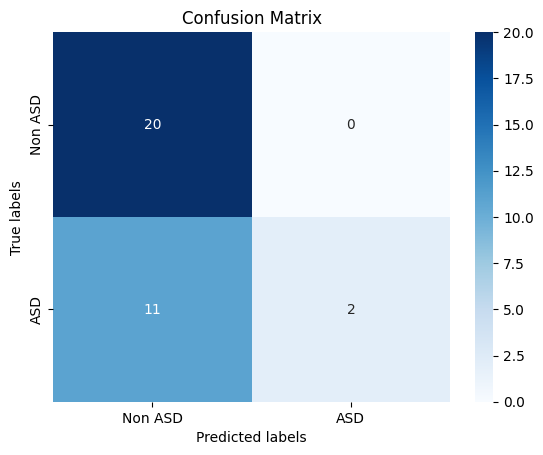

In [20]:
pipeline(x, y, 0.06, 42, True, 5, KNeighborsClassifier())

c:\Users\Yousef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold_1 accuracy: 0.7475728155339806



c:\Users\Yousef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold_2 accuracy: 0.7087378640776699



c:\Users\Yousef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold_3 accuracy: 0.7647058823529411



c:\Users\Yousef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold_4 accuracy: 0.696078431372549



c:\Users\Yousef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold_5 accuracy: 0.7058823529411765

------------------------------
The average accuracy for the 5 folds Train/Val: 0.7245954692556635
------------------------------
The final accuracy for the test set: 0.7878787878787878
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        27
           1       0.46      1.00      0.63         6

    accuracy                           0.79        33
   macro avg       0.73      0.87      0.74        33
weighted avg       0.90      0.79      0.81        33



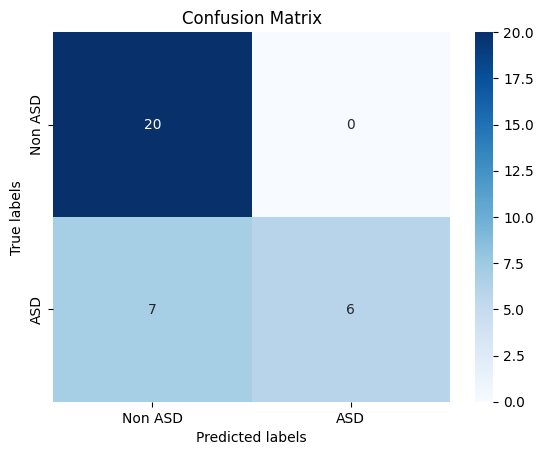

In [21]:
pipeline(x, y, 0.06, 42, True, 5, SVC())

Fold_1 accuracy: 0.6310679611650486

Fold_2 accuracy: 0.5339805825242718

Fold_3 accuracy: 0.6176470588235294

Fold_4 accuracy: 0.5294117647058824

Fold_5 accuracy: 0.6470588235294118

------------------------------
The average accuracy for the 5 folds Train/Val: 0.5918332381496287
------------------------------
The final accuracy for the test set: 0.6060606060606061
              precision    recall  f1-score   support

           0       0.70      0.67      0.68        21
           1       0.46      0.50      0.48        12

    accuracy                           0.61        33
   macro avg       0.58      0.58      0.58        33
weighted avg       0.61      0.61      0.61        33



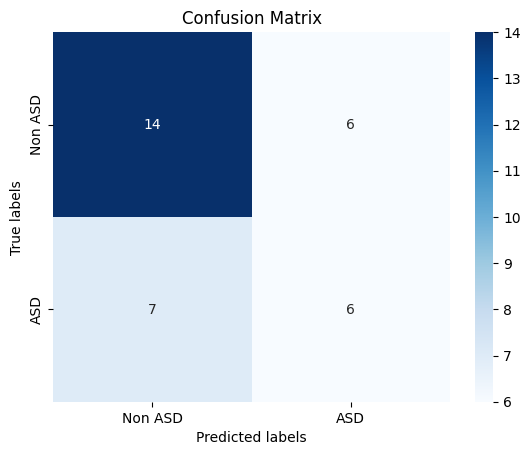

In [22]:
pipeline(x, y, 0.06, 42, True, 5, DecisionTreeClassifier())

c:\Users\Yousef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fold_1 accuracy: 0.7572815533980582



c:\Users\Yousef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fold_2 accuracy: 0.6310679611650486



c:\Users\Yousef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fold_3 accuracy: 0.7254901960784313



c:\Users\Yousef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fold_4 accuracy: 0.7156862745098039



c:\Users\Yousef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fold_5 accuracy: 0.7156862745098039

------------------------------
The average accuracy for the 5 folds Train/Val: 0.7090424519322293
------------------------------
The final accuracy for the test set: 0.7575757575757576
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        22
           1       0.62      0.73      0.67        11

    accuracy                           0.76        33
   macro avg       0.73      0.75      0.74        33
weighted avg       0.77      0.76      0.76        33



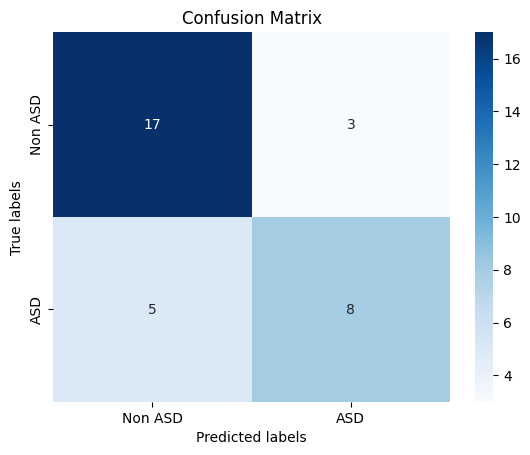

In [23]:
pipeline(x, y, 0.06, 42, True, 5, RandomForestClassifier())